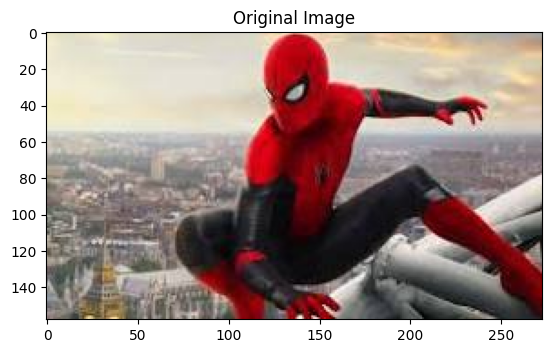

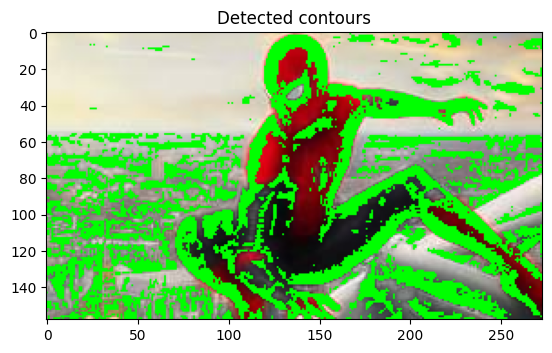

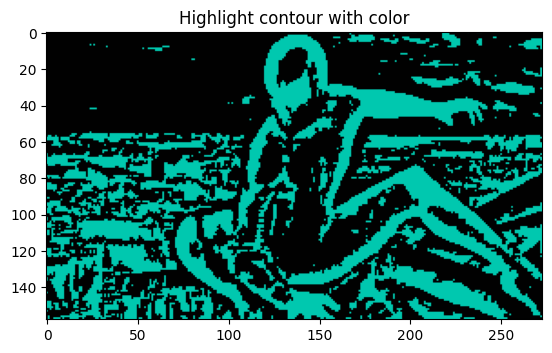

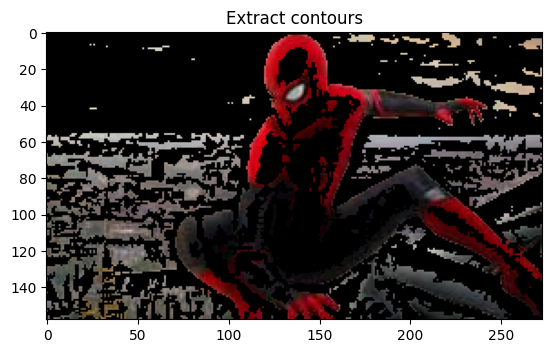

<Figure size 640x480 with 0 Axes>

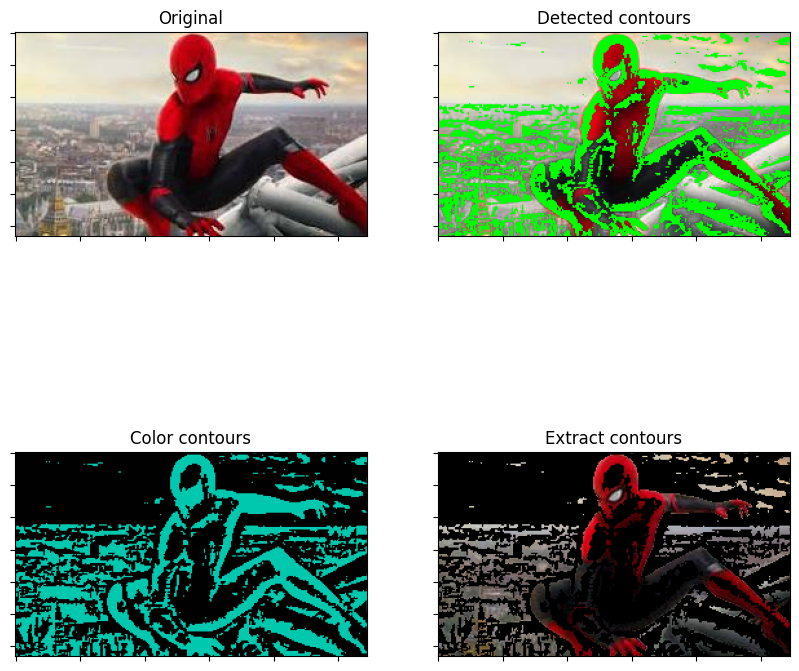

In [1]:
# imports Pustaka
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Loading Gambar
file = r"C:\Users\LENOVO\Pictures\Saved Pictures\spiderman.jpg"  # Sesuaikan path gambar
img = cv2.imread(file)

if img is None:
    raise FileNotFoundError(f"File gambar tidak ditemukan di {file}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Konversi citra warna menjadi abu-abu
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)

# Fungsi untuk menemukan kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = img.copy()
cv2.drawContours(detected_contours, contours, -1, (0, 255, 0), -1)
plt.imshow(detected_contours)
plt.title('Detected contours')
plt.show()

contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Masking gambar
highlight = np.ones_like(img)
cv2.drawContours(highlight, contours, -1, (0, 200, 175), cv2.FILLED)
plt.imshow(highlight)
plt.title('Highlight contour with color')
plt.show()

# Penyamaran Kembali atau ulang
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)
foreground = cv2.bitwise_and(img, mask)

# Tepi
plt.imshow(foreground)
plt.title('Extract contours')
plt.show()

# --main-plot--
contours = {"Original": img, "Detected contours": detected_contours,
            "Color contours": highlight, "Extract contours": foreground}
plt.subplots_adjust(wspace=.2, hspace=.2)
plt.tight_layout()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, (key, value) in enumerate(contours.items()):
    ax = axes[i]
    ax.imshow(value)
    ax.set_title(key)
    ax.tick_params(labelbottom=False, labelleft=False)

plt.show()
